C:\Users\Lenovo\OneDrive\Documents\Datasets

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

!gdown 1fLuRn7BLw_Mz_AbzAaYVt3D336RSRRvK

Downloading...
From: https://drive.google.com/uc?id=1fLuRn7BLw_Mz_AbzAaYVt3D336RSRRvK
To: c:\Users\Lenovo\OneDrive\Documents\Python\CodingWise\ML\cars24-car-price-clean(YScaled_MaxMin).csv

  0%|          | 0.00/4.19M [00:00<?, ?B/s]
 13%|█▎        | 524k/4.19M [00:00<00:01, 2.91MB/s]
 38%|███▊      | 1.57M/4.19M [00:00<00:00, 6.03MB/s]
 63%|██████▎   | 2.62M/4.19M [00:00<00:00, 7.43MB/s]
100%|██████████| 4.19M/4.19M [00:00<00:00, 9.53MB/s]


In [6]:
df = pd.read_csv('cars24-car-price-clean(YScaled_MaxMin).csv')
df.head()

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,0.184371,0.042522,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,0.207231,0.225975,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,0.207231,0.120277,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,0.184371,0.093549,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.224624,0.300085,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


## Univariate Linear Regression

Below ML predition training involves preditction of selling price using only one feature

In [ ]:
# define X and y
X = df["model"].values                          # using model as a single input feature
Y = df["selling_price"].values                  # training model to predict SP using train data

# standardize the data
u = X.mean()
std = X.std()
X = (X-u)/std

Importing libraries for ML analysis

In [8]:
model = LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
model.fit(X,Y)                      # gives error without reshaping

ValueError: Expected 2D array, got 1D array instead:
array=[-1.12568266 -0.3332271  -0.78980745 ... -0.4486842   0.32802721
  1.03651397].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
print(X.shape,Y.shape)                          # shows X & Y is a scalar 1D array

(19820,) (19820,)


In [13]:
X = X.reshape(X.size, 1)                        # reshaping to form a 2D vector array
Y = Y.reshape(Y.size, 1)

print(X.shape,Y.shape)

(19820, 1) (19820, 1)


In [14]:
model.fit(X,Y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Above output shows that model is trained with our training data

In [ ]:
y_hat = model.predict(X)                    # giving the same training data to model to check if accurate

print('Predicted')
print(y_hat)
print('Actual')
print(Y)

Predicted
[[0.04949638]
 [0.22942491]
 [0.12575748]
 ...
 [0.20321015]
 [0.37956395]
 [0.5404272 ]]
Actual
[[0.04368402]
 [0.25239655]
 [0.08979493]
 ...
 [0.19172431]
 [0.5800267 ]
 [0.56789225]]


In [16]:
w0 = model.intercept_                     # to see what were the best coeffecients of w calculated after gradient descent
w1 = model.coef_
print(w0, w1)

[0.30508475] [[0.22705189]]


## Visualising Predictions

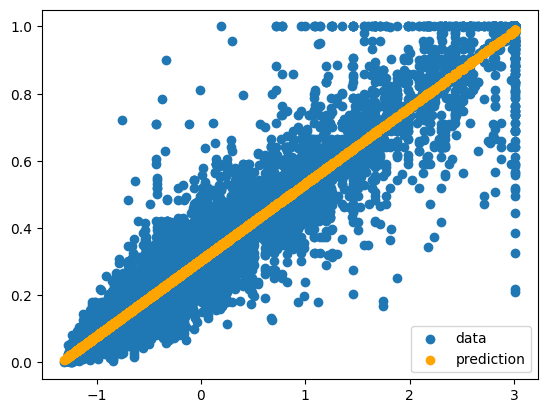

In [ ]:
fig = plt.figure()
plt.scatter(X,Y,label='data')                                   # plot with training values of X & Y
plt.scatter(X,y_hat,color='orange',label='prediction')          # plot with values of X & prdicted Y by model
plt.legend()
plt.show()

Performance metric - coefficient of determination of the prediction ( R2 )

In [ ]:
model.score(X,Y)                        # R square value from model

0.9313236629576508

This is a good score indicating accuracy of our model on a data, same as training data is good.

however, an Rsquare of 0.54, means that our Univariate LR model just performed decent as compared to a mean model